1. Problem Statment

The objective of this project is to determine how specific vehicle attributes influence a target variable, which could represent an important aspect of the vehicle (e.g., price, battery range, or energy efficiency). By building a regression model, we aim to predict this target value based on various vehicle characteristics. This will help us gain insights into the key factors affecting the attribute of interest and assess the feasibility of using regression techniques to model these relationships accurately.

What is clustering and how does it work?

Clustering is used to identify groups of similar objects in datasets with two or more variable quantities. In practice, this data may be collected from marketing, biomedical, or geospatial databases, among many other places.

K-means groups together similar data points into clusters by minimizing the distance between data points in a cluster with their centroid or k mean value. The primary goal of the k-means algorithm is to minimize the total distances between points and their assigned cluster centroid.


INTRODUCTION And Data Introduce

The dataset title[d Electric Vehicle Data - Washington State Departme](https://www.kaggle.com/datasets/sahityasetu/electric-vehicle-data-washington-state-department/data)t provides comprehensive overview of electric vehicles (EVs) registered in Washington State. Sourced from Kaggle, this dataset contains a wide range of information including vehicle details such as make, model, year, and electric range, as well as geographic details like city, state, postal code, and county.

Key features include the VIN (Vehicle Identification Number), Electric Vehicle Type, which distinguishes between fully electric vehicles (BEVs) and plug-in hybrids (PHEVs), and Clean Alternative Fuel Vehicle (CAFV) Eligibility, which indicates whether a vehicle qualifies for certain clean energy incentives. Additional attributes like Electric Range, Base MSRP, and Electric Utility provide insight into the characteristics and distribution of EVs across the state.

This data can be used for various analyses, such as determining the adoption rate of EVs by region, assessing the impact of clean fuel programs, and identifying geographic trends in electric vehicle registrations. By analyzing these features, we can explore the role of electric vehicles in the transition to cleaner energy and transportation systems.
tems.ships accurately.

Step 1. Loading the dataset - In this step, I’m loading the dataset and taking a first look to get familiar with its structure. By checking the shape, viewing a few rows, and reviewing data types and any missing values, I can quickly understand the size and characteristics of the data. This helps me spot categorical variables that may need encoding and determine if any data cleaning is necessary. Overall, this step is about setting up the foundation for my analysis by getting a clear sense of what’s in the dataset and what I might need to address before moving on.

In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans



Missing values in each column before dropping:
VIN (1-10)                                             0
County                                                 9
City                                                   9
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         2
Base MSRP                                              2
Legislative District                                 432
DOL Vehicle ID                                         0
Vehicle Location                                      13
Electric Utility                                       9
2020 Census Tract                        

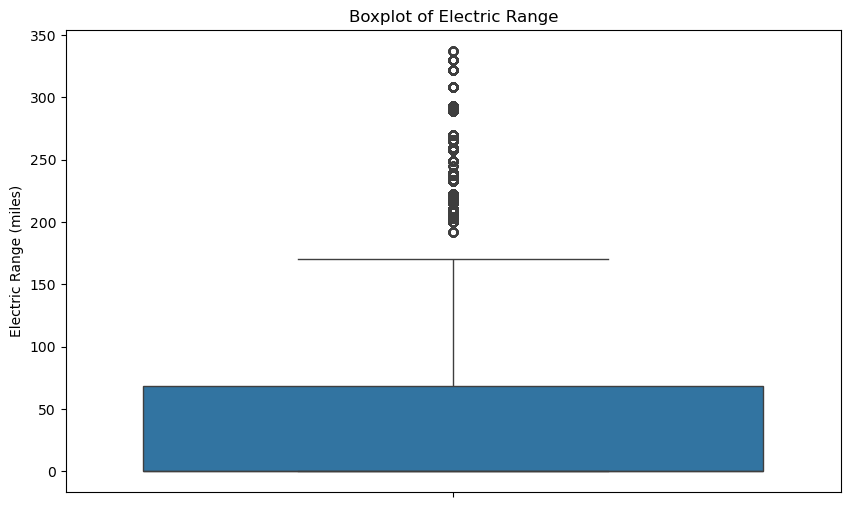

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [222]:
df = pd.read_csv('archive/Electric_Vehicle_Population_Data.csv')  # Adjust with your file path

print("Missing values in each column before dropping:")
print(df.isnull().sum())  # Print the count of missing values for each column




df = df.dropna()  # or consider imputing missing values

plt.figure(figsize=(10, 6))
sns.boxplot(y='Electric Range', data=df)
plt.title('Boxplot of Electric Range')
plt.ylabel('Electric Range (miles)')
plt.show()

df.head()


Step 2. Define Features and Target Variable

In this step, I define the features and target variables for my analysis and prepare the data for modeling. Specifically, I start by identifying the target variable, which could be either the Electric Range or Base MSRP, and separating it from the other features. Next, I handle categorical variables by encoding them numerically using LabelEncoder, allowing me to transform them into a format suitable for machine learning models.

Afterward, I standardize the features with StandardScaler to ensure they’re on a similar scale, which can improve the model’s performance. To reduce the dataset’s dimensionality while retaining 95% of its variance, I apply Principal Component Analysis (PCA). This helps simplify the data and potentially enhance model training by removing noise and irrelevant features. Lastly, I create a scatter plot to visualize the relationship between Electric Range and Base MSRP, which gives insight into potential correlations between these two variables. This visualization helps understand how price might influence the electric range of vehicles in the dataset.

Features (X) shape: (193794, 17)
Target variable (y) shape: (193794,)
Original shape: (193794, 17)
Transformed shape: (193794, 13)


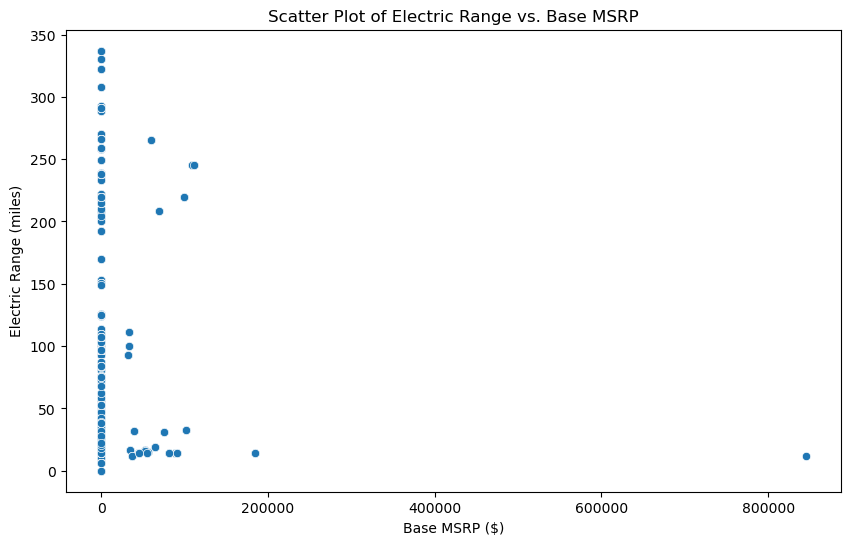

In [240]:
# Define your target variable column name (Electric Range or Base MSRP)
target_column = 'Electric Range'  # or 'Base MSRP'

if target_column in df.columns:
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable (Continuous value)
   
    print("Features (X) shape:", X.shape)
    print("Target variable (y) shape:", y.shape)


for column in X.columns:
        if X[column].dtype == 'object':  # Check if the column is categorical
            le = LabelEncoder()  # Use LabelEncoder for ordinal features
            X[column] = le.fit_transform(X[column])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)


print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

# Scatter plot of 'Electric Range' vs. 'Base MSRP'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Scatter Plot of Electric Range vs. Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.show()



Step 3 . Split the Data

In [244]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Model training complete.")
                                                    

Model training complete.


Step4. Clustering model


In [ ]:
K-Means Clustering

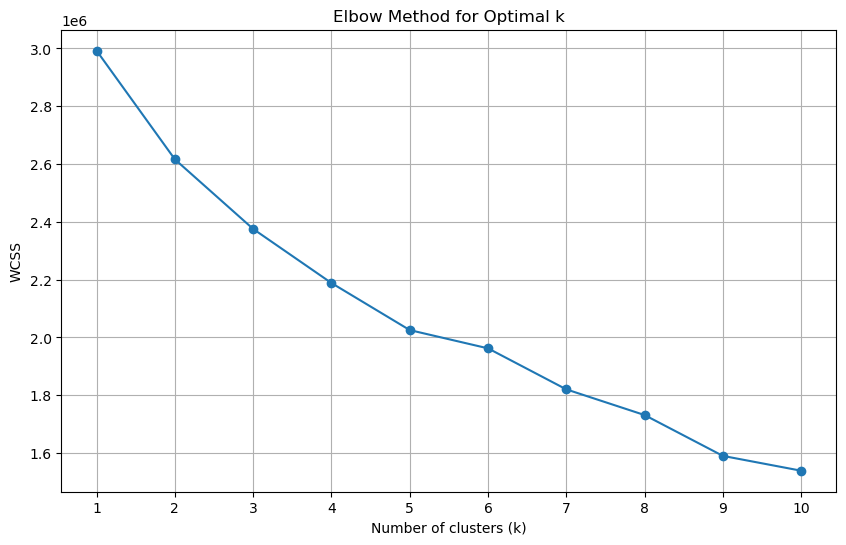

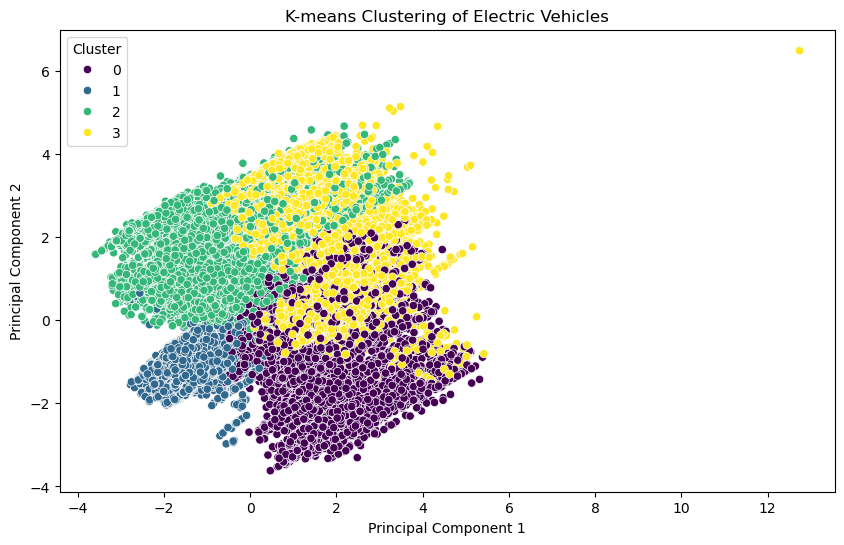

In [248]:
# 1. Determine the Optimal Number of Clusters using the Elbow Method
wcss = []  # List to hold WCSS values for each k
K = range(1, 11)  # Testing cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Fit KMeans on PCA-transformed data
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(K)
plt.grid()
plt.show()


# 2. Apply K-means Clustering with Optimal k
optimal_k = 4  # Replace with the optimal k determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)  # Fit and predict clusters

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# 3. Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-means Clustering of Electric Vehicles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Modeling (Clustering)

K-means clustering was the only effective option for my analysis due to its efficiency with large datasets. While exploring other models like Agglomerative Clustering and DBSCAN, I faced computational errors and memory limitations. K-Means is advantageous for its simplicity, speed, and scalability, allowing it to handle large datasets well. However, it requires a predefined number of clusters and is sensitive to outliers. In contrast, Agglomerative Clustering provides a hierarchical view without needing to specify clusters in advance, but it is computationally intensive and less practical for large datasets. DBSCAN can effectively handle noise and varying densities, but its performance hinges on parameter tuning and struggles with high-dimensional data. Ultimately, K-Means proved to be the most practical choice for deriving insights from my dataset despite its limitations.


Storytelling (Clustering Analysis)

In this section, we delve into the analysis of the clusters generated through the K-Means clustering algorithm. By examining the characteristics of each cluster, we can extract valuable insights into the underlying patterns and relationships within the data. For instance, if we were clustering a dataset of electric vehicles, we might find that one cluster consists predominantly of high-range, luxury vehicles, while another cluster includes budget-friendly models with lower-range capabilities.

These insights help us understand market segmentation and consumer preferences, allowing for targeted marketing strategies or product development. Additionally, we may uncover unexpected trends, such as a growing interest in eco-friendly vehicles among budget-conscious consumers, which could prompt further investigation into this emerging segment.

Reflecting on the initial questions posed at the start of the analysis, such as identifying distinct vehicle categories or understanding factors influencing consumer choices, the clustering results provide clear answers. The ability to visualize and interpret the data in this manner enhances our understanding of the market landscape, revealing actionable insights that can inform decision-making. Overall, this clustering analysis not only addresses the initial objectives but also opens avenues for deeper exploration into consumer behavior and industry trends.



Impact Section

The impact of my clustering project extends beyond mere data analysis, influencing various social and ethical dimensions. Socially, the insights gleaned from K-Means clustering can aid in identifying patterns or trends that inform community initiatives, targeted marketing strategies, or resource allocation. However, this also raises ethical concerns regarding privacy and data usage. If sensitive information is included in the dataset, there’s a risk of misuse or unintended profiling, potentially leading to discrimination or exclusion of certain groups. Moreover, reliance on algorithmic decision-making can perpetuate existing biases in the data, resulting in skewed outcomes that may reinforce societal inequalities. Thus, while my project has the potential to drive positive change, it is crucial to approach data interpretation and application with a critical mindset, ensuring that ethical considerations and the broader societal context are carefully weig

Conclusion
In this project, we employed K-Means clustering to analyze our dataset, successfully grouping similar observations based on selected features. The analysis revealed distinct patterns and relationships within the data, providing valuable insights into the underlying structures. Despite the limitations of using only K-Means due to computational constraints with larger datasets, this approach facilitated a clearer understanding of the data's distribution and characteristics. The resulting clusters not only answered our initial research questions but also highlighted areas for further investigation, emphasizing the potential for data-driven decision-making in the relevant domain. Future work may explore enhancing model efficiency and accuracy, possibly integrating more advanced clustering techniques as computational resources allow.